In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [225]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import *
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peddi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
print(stop_words)

{'don', 'be', 'where', 'll', 'y', 'yours', 'on', 'so', 'then', 'below', "she's", 'both', "wouldn't", "weren't", 'my', 'but', 'yourself', 'again', 'wouldn', "should've", 'being', 'now', 'you', 'out', 'm', 'hasn', "wasn't", 'there', 'we', "aren't", 'himself', 'themselves', 'these', 'those', 'by', 'down', 'once', 'should', 've', "hadn't", 'and', "couldn't", 'the', "that'll", 'hadn', 'of', 'own', 'through', 'will', "hasn't", "shouldn't", 'such', 'against', 'any', 'weren', 'from', 'most', 'not', 'didn', 'couldn', 'just', 'your', 'until', 't', 'more', 're', "mustn't", 'o', 'his', 'no', "needn't", "didn't", 'doesn', 'under', 'during', 'whom', 'nor', 'above', 'me', 'when', 'too', 'very', 'this', 'yourselves', 'other', 'why', 'them', 'at', 'or', "mightn't", 'ma', 'won', 'same', 'myself', "won't", 'isn', 'had', 'was', "you'd", 'are', 'she', 'theirs', 'haven', 'few', 's', "don't", 'i', 'for', 'do', 'after', 'were', 'a', 'as', "doesn't", 'into', 'each', 'can', 'mightn', 'ourselves', 'if', 'while',

In [4]:
os.getcwd()

'C:\\Users\\peddi\\NLP files'

In [5]:
os.chdir('D:\Data science\Datasets\sentiment analysis dataset(airline)')

In [6]:
df=pd.read_csv('airline_sentiment_analysis.csv')
df.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [7]:
df1=df.copy()

In [8]:
df.shape

(11541, 3)

In [9]:
df.isnull().sum()

Unnamed: 0           0
airline_sentiment    0
text                 0
dtype: int64

In [10]:
df.dtypes

Unnamed: 0            int64
airline_sentiment    object
text                 object
dtype: object

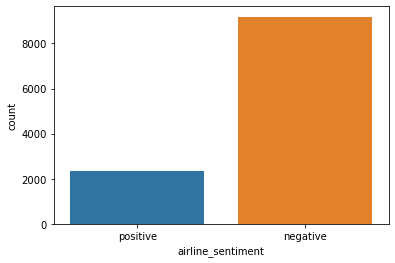

In [11]:
sns.countplot(df['airline_sentiment'])

In [12]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [14]:
df.describe()

,airline_sentiment,text
count,11541,11541
unique,2,11381
top,negative,@AmericanAir thanks
freq,9178,5


In [15]:
sentiment=df['airline_sentiment']

In [16]:
type(sentiment)

pandas.core.series.Series

In [17]:
sentiment

0        positive
1        negative
2        negative
3        negative
4        positive
           ...   
11536    negative
11537    negative
11538    positive
11539    negative
11540    negative
Name: airline_sentiment, Length: 11541, dtype: object

In [18]:
sentiment.value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [19]:
sentiment.keys()

RangeIndex(start=0, stop=11541, step=1)

In [20]:
sentiment=sentiment.map({'positive':1,'negative':0})

In [21]:
sentiment

0        1
1        0
2        0
3        0
4        1
        ..
11536    0
11537    0
11538    1
11539    0
11540    0
Name: airline_sentiment, Length: 11541, dtype: int64

In [22]:
df['airline_sentiment']=sentiment

In [23]:
df.head()

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials t...
1,0,@VirginAmerica it's really aggressive to blast...
2,0,@VirginAmerica and it's a really big bad thing...
3,0,@VirginAmerica seriously would pay $30 a fligh...
4,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [24]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [25]:
df1.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


- Preprocessing has been done only on the df dataframe and df1 contains the same data without any changes

In [26]:
df.dtypes

airline_sentiment     int64
text                 object
dtype: object

In [27]:
text=df['text']

In [28]:
text

0        @VirginAmerica plus you've added commercials t...
1        @VirginAmerica it's really aggressive to blast...
2        @VirginAmerica and it's a really big bad thing...
3        @VirginAmerica seriously would pay $30 a fligh...
4        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
11536    @AmericanAir my flight was Cancelled Flightled...
11537           @AmericanAir right on cue with the delays👌
11538    @AmericanAir thank you we got on a different f...
11539    @AmericanAir leaving over 20 minutes Late Flig...
11540    @AmericanAir you have my money, you change my ...
Name: text, Length: 11541, dtype: object

In [29]:
reviews=list(text)

In [30]:
reviews

["@VirginAmerica plus you've added commercials to the experience... tacky.",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D',
 "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
 "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlX

In [31]:
#df['airline_sentiment']=df['airline_sentiment'].map({'postive':1,'negative':0})

In [32]:
df.columns

Index(['airline_sentiment', 'text'], dtype='object')

In [33]:
df.head()

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials t...
1,0,@VirginAmerica it's really aggressive to blast...
2,0,@VirginAmerica and it's a really big bad thing...
3,0,@VirginAmerica seriously would pay $30 a fligh...
4,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [40]:
type(df['airline_sentiment'])

pandas.core.series.Series

In [41]:
np.array(df['airline_sentiment'])

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
df['airline_sentiment'].shape

(11541,)

In [44]:
df['airline_sentiment']

0        1
1        0
2        0
3        0
4        1
        ..
11536    0
11537    0
11538    1
11539    0
11540    0
Name: airline_sentiment, Length: 11541, dtype: int64

In [34]:
def text_preprocessing(reviews):
    
    
    """ This will clean the text data, remove html tags, remove special characters and then tokenize the reviews to apply Stemmer on each word token."""
    
    pre_processed_reviews=[]
    
    for review in tqdm(reviews):
        #review= BeautifulSoup(review,'lxml').getText()#remove html tags
    
        review=re.sub('[^A-Za-z]+',' ',review) #remove special chars
        review=re.sub("n't","not",review)
        review=nltk.word_tokenize(str(review.lower())) #tokenize the reviews into word tokens
        review=' '.join(PorterStemmer().stem(word) for word in review if word not in stopwords.words('english'))
        pre_processed_reviews.append(review.strip())
    return pre_processed_reviews

In [35]:
processed_reviews=text_preprocessing(text)

100%|████████████████████████████████████████████████████████████████████████████| 11541/11541 [02:05<00:00, 92.24it/s]


In [36]:
processed_reviews

['virginamerica plu ad commerci experi tacki',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'virginamerica flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli virginamerica',
 'virginamerica know would amazingli awesom bo fll pleas want fli',
 'virginam

In [147]:
x=df.iloc[:,1].values
y=df.iloc[:,0].values
#y=y.reshape(-1,1)

In [152]:
type(x)
type(df['text'])

numpy.ndarray

pandas.core.series.Series

In [155]:
x=df['text']
y=df['airline_sentiment']

In [156]:
type(x)
type(y)
type(df['text'])
type(df['airline_sentiment'])

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

In [157]:
y.shape

(11541,)

In [158]:
x.shape

(11541,)

In [119]:
#x=df[['text']]

In [120]:
#x.shape

In [159]:
#split the data into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y)#.text,processed_reviews.sentiment)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
#Applying TFIDF
tfidf_model=TfidfVectorizer(ngram_range=(1,2),min_df=10, max_features=6000)
tfidf_model.fit(x_train,y_train)
x_train_tfidf=tfidf_model.transform(x_train)
x_test_tfidf=tfidf_model.transform(x_test)
print(x_train_tfidf.shape,x_test_tfidf.shape)

(8655,) (2886,)
(8655,) (2886,)


TfidfVectorizer(max_features=6000, min_df=10, ngram_range=(1, 2))

(8655, 3081) (2886, 3081)


In [160]:
tfidf_df=pd.DataFrame(x_train_tfidf.toarray(),columns=tfidf_model.get_feature_names(),index=x_train.index)
tfidf_df

,000,10,100,11,12,13,14,15,15 minutes,150,...,your response,your service,your site,your staff,your system,your team,your website,yr,yyz,zero
3448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
# Lets checkout the top features
top_features=sorted(zip(tfidf_model.idf_,tfidf_model.get_feature_names()))
top30=top_features[:30]

In [174]:
top30

[(1.8301172751577672, 'to'),
 (2.0566449244562177, 'the'),
 (2.2823674048650098, 'united'),
 (2.3231720456555136, 'for'),
 (2.3283917182283584, 'you'),
 (2.3780108346932467, 'and'),
 (2.3993178010061773, 'flight'),
 (2.4063650465215805, 'on'),
 (2.4868400336901866, 'usairways'),
 (2.555577444708256, 'americanair'),
 (2.5810777177966013, 'my'),
 (2.695777359279182, 'is'),
 (2.8175039287156527, 'in'),
 (2.87684026266594, 'southwestair'),
 (2.892049681329469, 'it'),
 (2.947181752024185, 'of'),
 (3.015018554018218, 'jetblue'),
 (3.0476062020170622, 'me'),
 (3.055696133779034, 'your'),
 (3.136491230322613, 'that'),
 (3.16326526392767, 'not'),
 (3.1928441668737446, 'was'),
 (3.199074716624381, 'have'),
 (3.2340544355204077, 'no'),
 (3.2602854476692773, 'at'),
 (3.261393481023639, 'with'),
 (3.3137376249445207, 'this'),
 (3.361593646122156, 'but'),
 (3.3751657236676995, 'can'),
 (3.413144971732916, 'get')]

In [164]:
!pip install wordcloud

<Figure size 720x576 with 0 Axes>

Text(0.5, 0.88, 'Top 30 words in airline data')

(-0.5, 399.5, 199.5, -0.5)

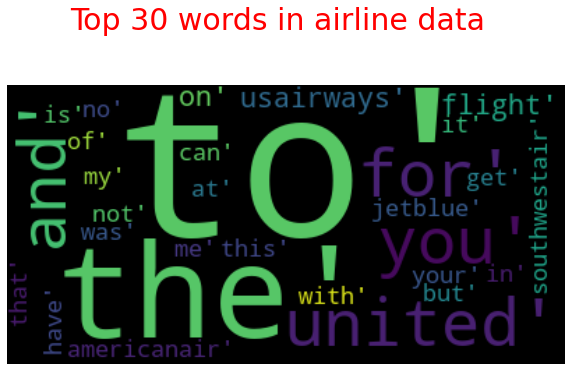

In [176]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black",max_font_size=150, random_state=42)
wc.generate(str(top30))
plt.imshow(wc, interpolation='bilinear')
plt.suptitle('Top 30 words in airline data', size=30, y=0.88,color="r"); 
plt.axis("off")
#plt.savefig("top15_words.png")
plt.show()

## Modelling

In [179]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_tfidf,y_train)
lr_predict=lr.predict(x_test_tfidf)
lr_f1=f1_score(y_test,lr_predict,average='weighted')
lr_f1

LogisticRegression(max_iter=1000)

0.9038840874534462

In [180]:
y_test
lr_predict
#lr_predict=lr_predict.reshape(-1,1)

2692    0
6886    0
9504    0
9755    0
7131    0
       ..
203     1
8626    0
5232    0
3687    1
6217    0
Name: airline_sentiment, Length: 2886, dtype: int64

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [181]:
y_test.shape
lr_predict.shape

(2886,)

(2886,)

In [182]:
type(y_test)
type(lr_predict)

pandas.core.series.Series

numpy.ndarray

In [190]:
#Confusion matrix:-
cm_lr=confusion_matrix(y_test,lr_predict)
cm_lr=pd.crosstab(y_test,lr_predict)

In [192]:
cm_lr

col_0,0,1
airline_sentiment,,
0,2275,44
1,215,352


<Figure size 504x360 with 0 Axes>

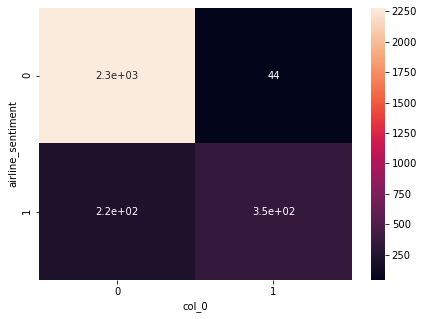

In [191]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_lr, annot=True)

In [193]:
y_train
y_test
x_train_tfidf
x_train
x_test
x_test_tfidf

3448     0
1676     0
7326     0
10256    0
11149    0
        ..
1934     0
9770     1
299      0
10535    0
9761     0
Name: airline_sentiment, Length: 8655, dtype: int64

2692    0
6886    0
9504    0
9755    0
7131    0
       ..
203     1
8626    0
5232    0
3687    1
6217    0
Name: airline_sentiment, Length: 2886, dtype: int64

<8655x3081 sparse matrix of type '<class 'numpy.float64'>'
	with 171863 stored elements in Compressed Sparse Row format>

3448     @united i have items of sentimental value that...
1676     @united it would be great to get a callback fr...
7326     @USAirways I'm tired of paying for luggage &am...
10256    @AmericanAir @EdPlotts don't bother trying to ...
11149    @AmericanAir any idea what's up with flight AA...
                               ...                        
1934     @united we are delayed in San Pedro, Belize. W...
9770     @AmericanAir I love the Admiral Clubs! Thanks,...
299      @VirginAmerica Thanks for making my flight fro...
10535    @AmericanAir Stuck in Miami, and one of the wo...
9761     @AmericanAir 2284, four hours Late Flightrs an...
Name: text, Length: 8655, dtype: object

2692    @united the wifi in the ewr lounge reminds me ...
6886    @USAirways membership has no privileges anymor...
9504    @AmericanAir  we are going to the police dept ...
9755    @AmericanAir nothing to do with Mother Nature,...
7131    @USAirways how do I get a hold of customer ser...
                              ...                        
203     @VirginAmerica would love to do more for virgi...
8626    @USAirways what's happening with 1217 Phl to L...
5232    @JetBlue I had to call back five times to get ...
3687    @SouthwestAir Awesome staff at the  check in d...
6217    @JetBlue if I'm about to get on a plane, I thi...
Name: text, Length: 2886, dtype: object

<2886x3081 sparse matrix of type '<class 'numpy.float64'>'
	with 56158 stored elements in Compressed Sparse Row format>

In [194]:
y_train.shape

(8655,)

In [195]:
x_train_tfidf.shape

(8655, 3081)

In [196]:
x_train_tfidf[0]

<1x3081 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [197]:
from imblearn.over_sampling import SMOTE
# Resample the minority class.
sm = SMOTE(sampling_strategy='auto', random_state=7)
oversampled_trainX, oversampled_trainY = sm.fit_resample(x_train_tfidf,y_train)
oversampled_trainY.value_counts()

1    6859
0    6859
Name: airline_sentiment, dtype: int64

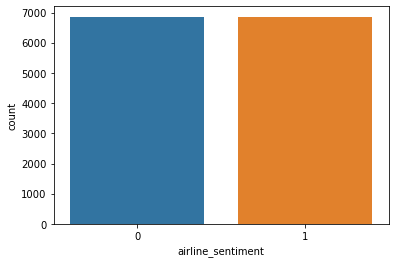

In [198]:
sns.countplot(oversampled_trainY)

In [199]:
# we will tune the parameters of Logistic Regression with RandomizedsearchCV
lr_params={"penalty":["l1","l2"],
           "C":[10**i for i in range(-4,4)]}
lr=LogisticRegression( max_iter=1000,solver="liblinear")
lr1=RandomizedSearchCV(lr,lr_params)
lr1.fit(oversampled_trainX,oversampled_trainY)
lr1.best_params_

RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']})

{'penalty': 'l2', 'C': 1000}

In [200]:
lr2=LogisticRegression(**lr1.best_params_, max_iter=1000,solver="liblinear")
lr2.fit(oversampled_trainX,oversampled_trainY)
lr2_predict=lr2.predict(x_test_tfidf)
lr2_f1=f1_score(lr2_predict,y_test,average="weighted")
lr2_f1

LogisticRegression(C=1000, max_iter=1000, solver='liblinear')

0.8978230097340046

<Figure size 504x360 with 0 Axes>

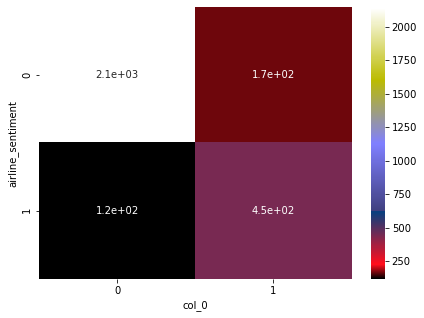

In [223]:
#Confusion matrix:-
cm_lr2=confusion_matrix(y_test,lr2_predict)
cm_lr2=pd.crosstab(y_test,lr2_predict)
plt.figure(figsize=(7,5))
sns.heatmap(cm_lr2, annot=True,cmap='gist_stern')

### SVC

In [202]:
from sklearn.svm import LinearSVC
svc_params={'penalty':['l1','l2'],
        'C':[10**i for i in range(-4,4)]}
svc_model=LinearSVC(dual=False,max_iter=5000)
rndm_svc=RandomizedSearchCV(svc_model,svc_params)
rndm_svc.fit(oversampled_trainX,oversampled_trainY)
svc_best_params=rndm_svc.best_estimator_

RandomizedSearchCV(estimator=LinearSVC(dual=False, max_iter=5000),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']})

In [203]:
svc_best_params

LinearSVC(C=10, dual=False, max_iter=5000)

In [204]:
svc_model1=LinearSVC(C=1000, dual=False, max_iter=5000)
svc_model1.fit(oversampled_trainX,oversampled_trainY)
svc_predict1=svc_model1.predict(x_test_tfidf)
svc1_f1=f1_score(y_test,svc_predict1,average="weighted")
svc1_f1

LinearSVC(C=1000, dual=False, max_iter=5000)

0.8958165243235621

<Figure size 504x360 with 0 Axes>

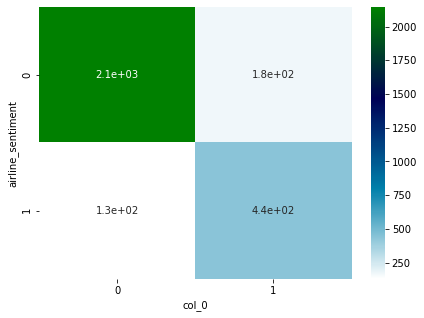

In [222]:
#Confusion matrix:-
cm_svc1=confusion_matrix(y_test,svc_predict1)
cm_svc1=pd.crosstab(y_test,svc_predict1)
plt.figure(figsize=(7,5))
sns.heatmap(cm_svc1, annot=True,cmap='ocean_r')

### Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier
dt_params={'max_depth':[i for i in range(5,2000,3)],
         'min_samples_split':[i for i in range(5,2000,3)]}
dt=DecisionTreeClassifier()
rndm_dt=RandomizedSearchCV(dt,dt_params)
rndm_dt.fit(oversampled_trainX,oversampled_trainY)
dt_best_params=rndm_dt.best_params_

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47, 50, 53, 56, 59,
                                                      62, 65, 68, 71, 74, 77,
                                                      80, 83, 86, 89, 92, ...],
                                        'min_samples_split': [5, 8, 11, 14, 17,
                                                              20, 23, 26, 29,
                                                              32, 35, 38, 41,
                                                              44, 47, 50, 53,
                                                              56, 59, 62, 65,
                                                              68, 71, 74, 77,
                                                              80, 83, 86, 89,
   

In [207]:
dt_best_params

{'min_samples_split': 53, 'max_depth': 617}

In [208]:
dt1=DecisionTreeClassifier(**dt_best_params)
dt1.fit(oversampled_trainX,oversampled_trainY)
dt_predict1=dt1.predict(x_test_tfidf)
dt1_f1=f1_score(y_test,dt_predict1,average="weighted")
dt1_f1

DecisionTreeClassifier(max_depth=617, min_samples_split=53)

0.8358334574916938

<Figure size 360x288 with 0 Axes>

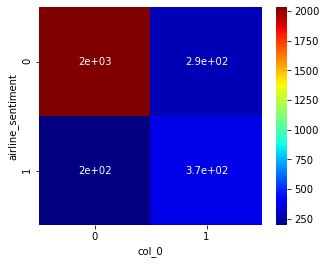

In [215]:
#Confusion matrix:-
cm_dt1=confusion_matrix(y_test,dt_predict1)
cm_dt1=pd.crosstab(y_test,dt_predict1)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt1, annot=True,cmap='jet')

### Naive Bayes

In [226]:
nb_params={"alpha":[10**i for i in range(-5,5)]}
nb=MultinomialNB()
rndm_nb=RandomizedSearchCV(nb,nb_params)
#rndm_clf.fit(oversampled_trainX,oversampled_trainY)
rndm_nb.fit(oversampled_trainX,oversampled_trainY)
nb_best_params=rndm_nb.best_params_
#fitting to Naive bayes algorithm after tuning
nb1=MultinomialNB(**nb_best_params)
nb1.fit(oversampled_trainX,oversampled_trainY)
nb_predict1=nb1.predict(x_test_tfidf)
nb1_f1=f1_score(y_test,nb_predict1,average="weighted")
nb1_f1

RandomizedSearchCV(estimator=MultinomialNB(),
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 10, 100, 1000,
                                                  10000]})

MultinomialNB(alpha=1e-05)

0.8913551437366389

<Figure size 360x288 with 0 Axes>

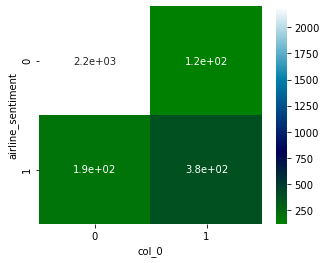

In [227]:
#Confusion matrix:-
cm_nb1=confusion_matrix(y_test,dt_predict1)
cm_nb1=pd.crosstab(y_test,nb_predict1)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb1, annot=True,cmap='ocean')

### Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier
param_rf={'max_depth':[2,3,4,5,6,7,8,9,10],'n_estimators':[i for i in range(1,1000,5)]}
rf=RandomForestClassifier()
rndm_rf=RandomizedSearchCV(rf,param_rf)
rndm_rf.fit(oversampled_trainX,oversampled_trainY)
rf_best_params=rndm_rf.best_params_

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [1, 6, 11, 16, 21, 26,
                                                         31, 36, 41, 46, 51, 56,
                                                         61, 66, 71, 76, 81, 86,
                                                         91, 96, 101, 106, 111,
                                                         116, 121, 126, 131,
                                                         136, 141, 146, ...]})

In [229]:
rf_best_params

{'n_estimators': 136, 'max_depth': 10}

In [230]:
rf1=RandomForestClassifier(**rf_best_params,class_weight='balanced')
rf1.fit(oversampled_trainX,oversampled_trainY)
rf_predict1=rf1.predict(x_test_tfidf)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=136)

In [232]:
rf1_f1=f1_score(y_test,rf_predict1,average="weighted")
rf1_f1

0.8730403533682797

<Figure size 360x288 with 0 Axes>

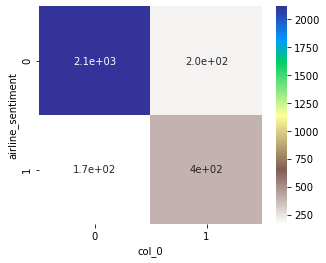

In [238]:
#Confusion matrix:-
cm_rf1=confusion_matrix(y_test,rf_predict1)
cm_rf1=pd.crosstab(y_test,rf_predict1)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf1, annot=True,cmap='terrain_r')

### Model Evaluation

In [240]:
models=["Logistic Regression","DecisionTrees","SVC","NaiveBayes","Random Forest"]
f1_scores=[lr2_f1,dt1_f1,svc1_f1,nb1_f1,rf1_f1]
f1_scores

[0.8978230097340046,
 0.8358334574916938,
 0.8958165243235621,
 0.8913551437366389,
 0.8730403533682797]

In [241]:
scores=pd.DataFrame(columns=['Model','Score'])

In [242]:
scores

,Model,Score


In [245]:
scores['Model']=models
scores['Score']=f1_scores

In [246]:
scores

,Model,Score
0,Logistic Regression,0.897823
1,DecisionTrees,0.835833
2,SVC,0.895817
3,NaiveBayes,0.891355
4,Random Forest,0.873040


<Figure size 432x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'F1 Scores of all models')

Text(0.9, 0, '0.9')

Text(0.9, 1, '0.84')

Text(0.9, 2, '0.9')

Text(0.9, 3, '0.89')

Text(0.9, 4, '0.87')

Text(0.5, 0, 'F1_SCores')

Text(0, 0.5, 'Models')

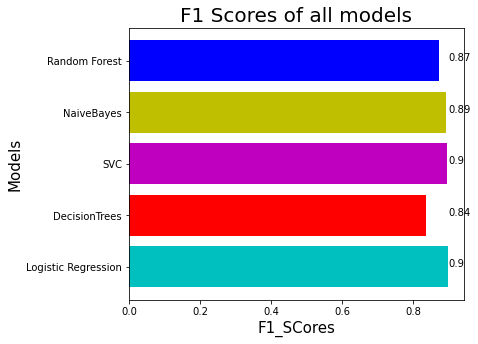

In [247]:
plt.figure(figsize=(6,5))
plt.barh(models,f1_scores,color=['c','r','m','y','b'])
plt.title("F1 Scores of all models",size=20)
for index, value in enumerate(f1_scores):
    plt.text(0.9,index,str(round(value,2)))
plt.xlabel('F1_SCores',size=15)
plt.ylabel("Models",size=15)
#plt.savefig("f1_scores.png")
plt.show()

In [248]:
cm_lr2

col_0,0,1
airline_sentiment,,
0,2147,172
1,118,449


In [249]:
cm_nb1

col_0,0,1
airline_sentiment,,
0,2200,119
1,187,380


In [250]:
118+172
187+119

290

306

- Considering the f1 scores and confusion matrix(accuracy) we can say that logistic regression is little superior to all the models by performing well and having higher accuracy levels than the other algorithms
- So Logistic Regression is best model for this airline dataset

In [253]:
# lets save the model
import pickle
pickle.dump(lr2,open("logistic_model.pkl","wb"))
pickle.dump(tfidf_model,open("tfidf_model.pkl","wb"))